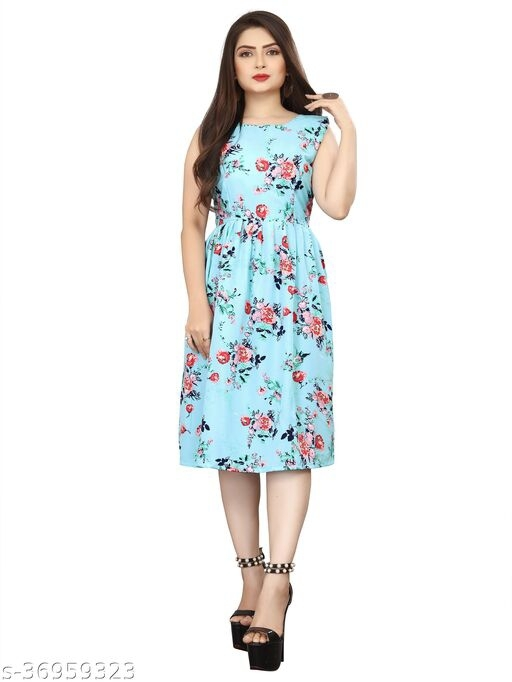

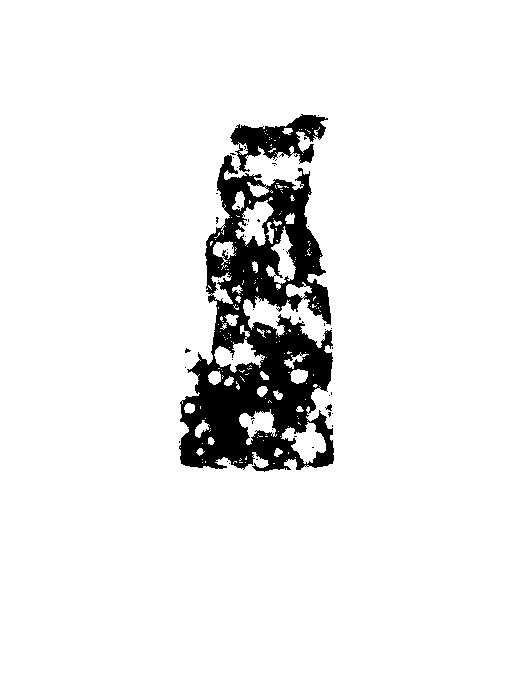

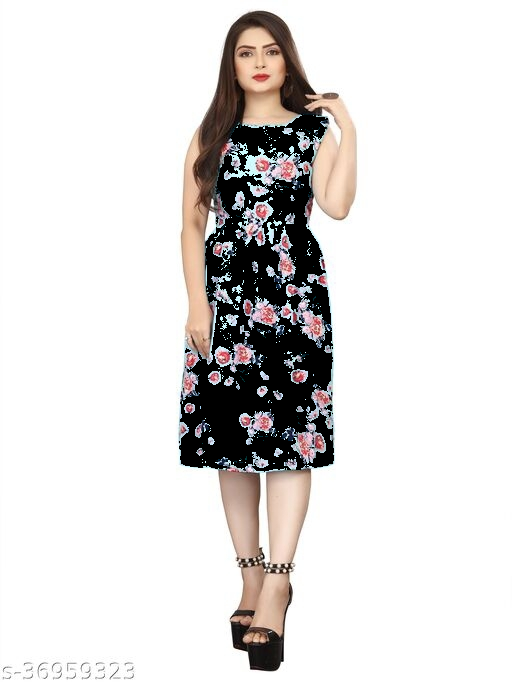

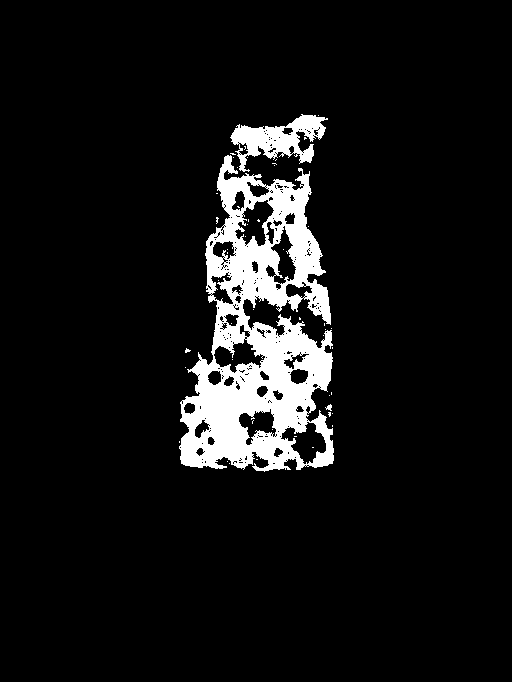

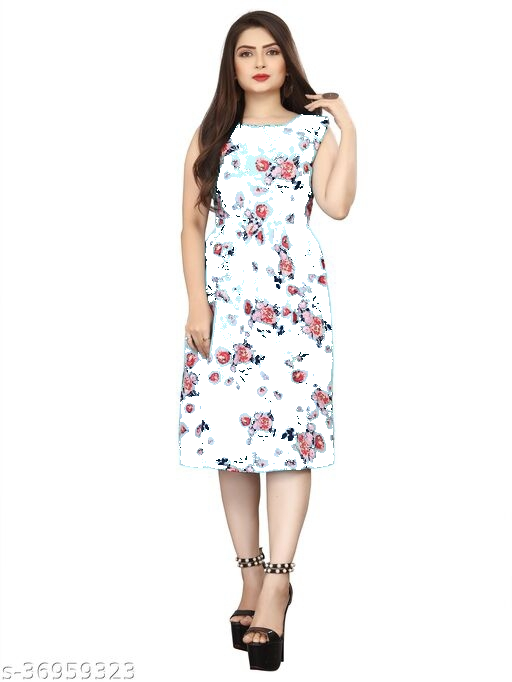

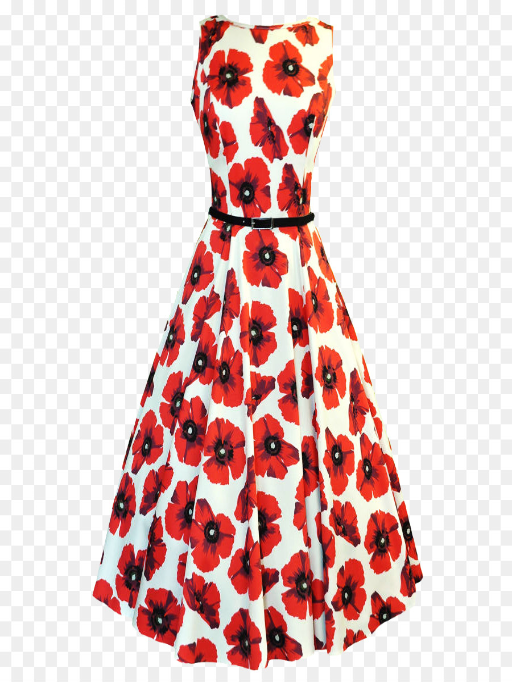

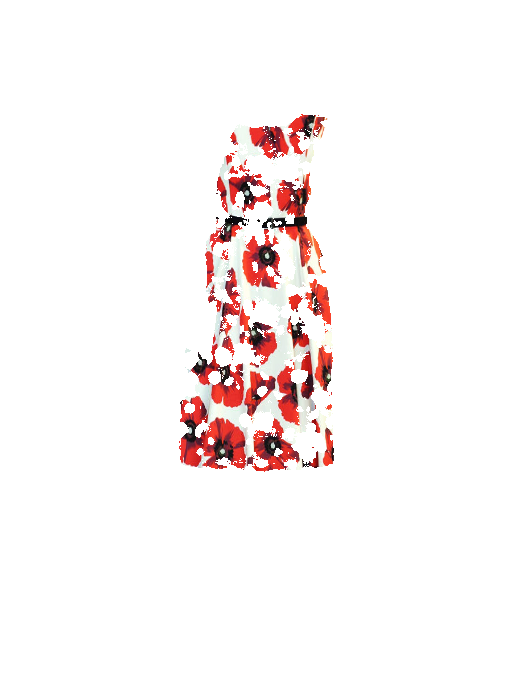

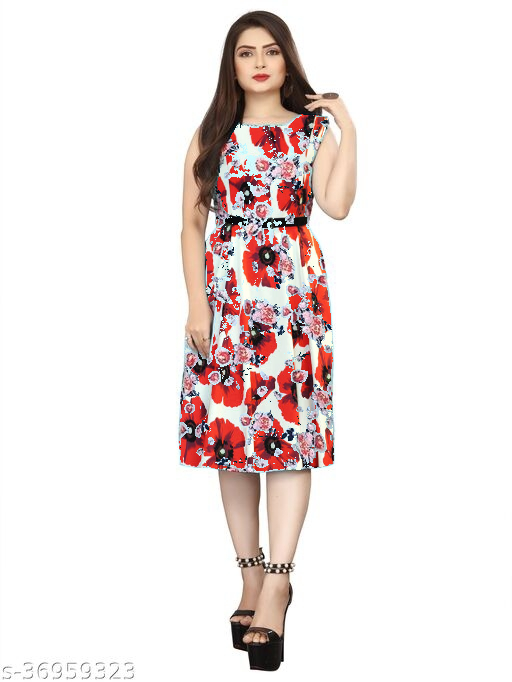

In [19]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def apply_design_on_image(image_path, design_path):
    # Read the frame
    frame = cv2.imread(image_path)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define range of green color in HSV
    lower_green = np.array([25, 52, 72])
    upper_green = np.array([102, 255, 255])

    # Threshold the HSV image to get only green colors
    mask_white = cv2.inRange(hsv, lower_green, upper_green)
    mask_black = cv2.bitwise_not(mask_white)

    # Converting mask_black to 3 channels
    W, L = mask_black.shape
    mask_black_3CH = np.empty((W, L, 3), dtype=np.uint8)
    mask_black_3CH[:, :, 0] = mask_black
    mask_black_3CH[:, :, 1] = mask_black
    mask_black_3CH[:, :, 2] = mask_black

    # Display original frame
    cv2_imshow(frame)

    # Display mask_black
    cv2_imshow(mask_black_3CH)

    # Apply bitwise AND operation
    dst3 = cv2.bitwise_and(mask_black_3CH, frame)
    cv2_imshow(dst3)

    # Convert mask_white to 3 channels
    W, L = mask_white.shape
    mask_white_3CH = np.empty((W, L, 3), dtype=np.uint8)
    mask_white_3CH[:, :, 0] = mask_white
    mask_white_3CH[:, :, 1] = mask_white
    mask_white_3CH[:, :, 2] = mask_white

    # Display mask_white
    cv2_imshow(mask_white_3CH)

    # Apply bitwise OR operation
    dst3_wh = cv2.bitwise_or(mask_white_3CH, dst3)
    cv2_imshow(dst3_wh)

    # Load and resize the design
    design = cv2.imread(design_path)
    design = cv2.resize(design, mask_black.shape[1::-1])
    cv2_imshow(design)

    # Mix design with mask_black
    design_mask_mixed = cv2.bitwise_or(mask_black_3CH, design)
    cv2_imshow(design_mask_mixed)

    # Apply bitwise AND operation with final mask
    final_mask_black_3CH = cv2.bitwise_and(design_mask_mixed, dst3_wh)
    cv2_imshow(final_mask_black_3CH)

    cv2.waitKey(0)

# Example usage
image_path = '/content/drive/MyDrive/person.jpg'
design_path = '/content/drive/MyDrive/dress.jpg'
apply_design_on_image(image_path, design_path)
